# Medidas experimentales en `flavio`

Las medidas experimentales disponibles en `flavio` se encuentran en un archivo de tipo YAML,

https://github.com/flav-io/flavio/blob/master/flavio/data/measurements.yml

La estructura básica de una medida experimental es la siguiente:

```yaml
HFAG rad 2014:
  experiment: HFAG
  inspire: Amhis:2014hma
  url: http://www.slac.stanford.edu/xorg/hfag/rare/2014/radll/OUTPUT/TABLES/radll.pdf
  values:
    BR(B+->K*gamma): 42.1 ± 1.8 e-6
    BR(B0->K*gamma): 43.3 ± 1.5 e-6
```

* El identificador de la medida experimental, que suele estar compuesto por el experimento, el observable y el año.

* A continuación, algunos metadatos (opcionales):
    * `experiment`
    * `inspire`: Referencia bibliográfica en [Inspire-HEP](https://inspirehep.net/).
    * `url`: Enlace a la publicación.
    * `description`

* El campo `values` contiene los valores experimentales. Para observables sin argumentos, como este ejemplo de $\mathrm{BR}(B\to K^*\gamma)$, el formato es que cada línea corresponda a un observable de `flavio` seguido de su valor experimental. Para observables con argumentos, el formato es

```yaml
Belle RK 2019:
  experiment: Belle
  inspire: Abdesselam:2019lab
  values:
    - name: <Rmue>(B+->Kll)
      q2min: 0.1
      q2max: 4.0
      value: 0.92 + 0.27 - 0.24 ± 0.05
    - name: <Rmue>(B0->Kll)
      q2min: 0.1
      q2max: 4.0
      value: 1.5 + 1.2 - 1.0 ± 0.1
```

Cada observable viene indicado con un `-`, en una línea el nombre, en las siguientes líneas sus argumentos, y finalmente el valor experimental.

Hay varias opciones para el valor experimental:

* Si los errores son gaussianos y/o gaussianos asimétricos, el formato es
    * En primer lugar el valor central (media y moda para una gaussiana, y moda para una gaussiana asimétrica)
    * A continuación, cada error simétrico precedido por `±`
    * y por cada error asimétrico, el error a la derecha precedido por `+` y el error a la izquierda precedido por `-`.
    * Opcionalmente, se pude mutiplicar todo el valor (valor central y errores) por una potencia de 10, con la notación `e-3`.

* Para límites de exclusión (es decir, el experimento no ha sido capaz de detectar el observable pero puede poner cotas a su valor) el formato es

```yaml
BR(B+->enu): < 0.98e-6 @ 90% CL
```

donde el primer número indica la cota, y el segundo el nivel de confidencia (confidence level).

* También se puede proprcionar la función de densidad de probabilidad para el valor experimental con la opción `distribution: numerical`. En este caso hay que proporcionar los valores del observable (`x`) y la densidad de probabilidad (`y`) como listas. Por ejemplo, el valor de $R_{K^*}$ obtenido en 2017 es

```yaml
LHCb RK* 2017:
   experiment: LHCb
   inspire: Aaij:2017vbb
   values:
     - name: <Rmue>(B0->K*ll)
       q2min: 0.045
       q2max: 1.1
       value:
         distribution: numerical
         x: [0.32203389830508472, 0.34406779661016951, 0.36610169491525424, 0.38813559322033897, 0.4101694915254237, 0.43220338983050843, 0.45423728813559322, 0.47627118644067795, 0.49830508474576268, 0.52033898305084747, 0.5423728813559322, 0.56440677966101693, 0.58644067796610166, 0.60847457627118651, 0.63050847457627124, 0.65254237288135597, 0.6745762711864407, 0.69661016949152543, 0.71864406779661016, 0.7406779661016949, 0.76271186440677963, 0.78474576271186436, 0.80677966101694909, 0.82881355932203382, 0.85084745762711855, 0.87288135593220328, 0.89491525423728802, 0.91694915254237297, 0.9389830508474577, 0.96101694915254243, 0.98305084745762716, 1.0050847457627119, 1.0271186440677966, 1.0491525423728814, 1.0711864406779661, 1.0932203389830508, 1.1152542372881356, 1.1372881355932203, 1.159322033898305, 1.1813559322033897, 1.2033898305084745, 1.2254237288135592, 1.2474576271186439, 1.2694915254237289, 1.2915254237288136, 1.3135593220338984, 1.3355932203389831, 1.3576271186440678, 1.3796610169491526, 1.4016949152542373, 1.423728813559322, 1.4457627118644067, 1.4677966101694915, 1.4898305084745762, 1.5118644067796609, 1.5338983050847459, 1.5559322033898306]
         y: [5.6809387153097712e-07, 6.0396698949963744e-06, 5.0150626650029067e-05, 0.0003252442213613549, 0.0016474524090636642, 0.006517577885966833, 0.020354852378992382, 0.05241872555125314, 0.11402931997866546, 0.21376567729264906, 0.35238195481274165, 0.51826255846771419, 0.690079259125155, 0.84088805077533757, 0.94804073141260814, 0.99705526660951094, 0.98621494071587834, 0.92325134828600275, 0.82319327858735192, 0.70253583154289834, 0.57669427782381144, 0.45717703819692768, 0.35138098968886583, 0.2627199920930387, 0.19170823632155595, 0.13692051144806572, 0.095966109900830474, 0.066164222711994056, 0.044971015782364079, 0.030190723371453614, 0.020053519226620586, 0.013198994295782356, 0.0086186961781051872, 0.0055903301579139381, 0.0036058135111671319, 0.0023072486153233413, 0.0014747707248869565, 0.00094165887445748651, 0.00060062261574288657, 0.00038269143292687658, 0.00024357616071383475, 0.00015486732723114267, 9.8361197460841327e-05, 6.2406064124841638e-05, 3.9552028358902991e-05, 2.5040887067679769e-05, 1.5836880526245869e-05, 1.0005264010065528e-05, 6.3143179585843096e-06, 3.9807355100871835e-06, 2.5069125268935054e-06, 1.5770810731381989e-06, 9.9107801111957362e-07, 6.2215793318564117e-07, 3.9015073327630452e-07, 2.4440112093889412e-07, 1.5293713179096793e-07]
```

Text(0, 0.5, 'Probabilidad')

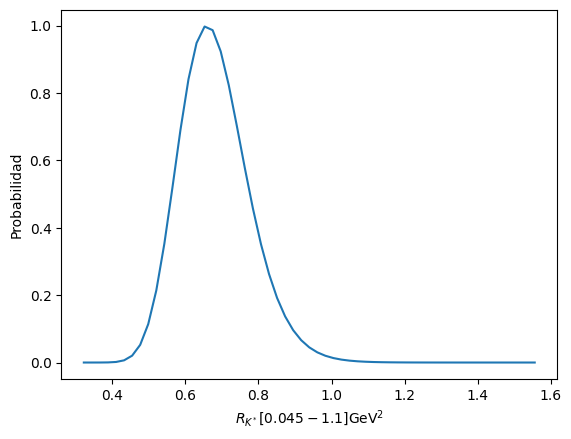

In [2]:
import matplotlib.pyplot as plt

x = [0.32203389830508472, 0.34406779661016951, 0.36610169491525424, 0.38813559322033897, 0.4101694915254237, 0.43220338983050843, 0.45423728813559322, 0.47627118644067795, 0.49830508474576268, 0.52033898305084747, 0.5423728813559322, 0.56440677966101693, 0.58644067796610166, 0.60847457627118651, 0.63050847457627124, 0.65254237288135597, 0.6745762711864407, 0.69661016949152543, 0.71864406779661016, 0.7406779661016949, 0.76271186440677963, 0.78474576271186436, 0.80677966101694909, 0.82881355932203382, 0.85084745762711855, 0.87288135593220328, 0.89491525423728802, 0.91694915254237297, 0.9389830508474577, 0.96101694915254243, 0.98305084745762716, 1.0050847457627119, 1.0271186440677966, 1.0491525423728814, 1.0711864406779661, 1.0932203389830508, 1.1152542372881356, 1.1372881355932203, 1.159322033898305, 1.1813559322033897, 1.2033898305084745, 1.2254237288135592, 1.2474576271186439, 1.2694915254237289, 1.2915254237288136, 1.3135593220338984, 1.3355932203389831, 1.3576271186440678, 1.3796610169491526, 1.4016949152542373, 1.423728813559322, 1.4457627118644067, 1.4677966101694915, 1.4898305084745762, 1.5118644067796609, 1.5338983050847459, 1.5559322033898306]
y = [5.6809387153097712e-07, 6.0396698949963744e-06, 5.0150626650029067e-05, 0.0003252442213613549, 0.0016474524090636642, 0.006517577885966833, 0.020354852378992382, 0.05241872555125314, 0.11402931997866546, 0.21376567729264906, 0.35238195481274165, 0.51826255846771419, 0.690079259125155, 0.84088805077533757, 0.94804073141260814, 0.99705526660951094, 0.98621494071587834, 0.92325134828600275, 0.82319327858735192, 0.70253583154289834, 0.57669427782381144, 0.45717703819692768, 0.35138098968886583, 0.2627199920930387, 0.19170823632155595, 0.13692051144806572, 0.095966109900830474, 0.066164222711994056, 0.044971015782364079, 0.030190723371453614, 0.020053519226620586, 0.013198994295782356, 0.0086186961781051872, 0.0055903301579139381, 0.0036058135111671319, 0.0023072486153233413, 0.0014747707248869565, 0.00094165887445748651, 0.00060062261574288657, 0.00038269143292687658, 0.00024357616071383475, 0.00015486732723114267, 9.8361197460841327e-05, 6.2406064124841638e-05, 3.9552028358902991e-05, 2.5040887067679769e-05, 1.5836880526245869e-05, 1.0005264010065528e-05, 6.3143179585843096e-06, 3.9807355100871835e-06, 2.5069125268935054e-06, 1.5770810731381989e-06, 9.9107801111957362e-07, 6.2215793318564117e-07, 3.9015073327630452e-07, 2.4440112093889412e-07, 1.5293713179096793e-07]
plt.plot(x, y)
plt.xlabel(r"$R_{K^*} [0.045-1.1] \mathrm{GeV}^2$")
plt.ylabel("Probabilidad")

Los resultados que estén correlacionados entre sí deben estar en la misma medida experimental. Si solamente son dos medidas, basta con indicar su correlación:

```yaml
BaBar RD 2012:
  experiment: BaBar
  inspire: Lees:2013uzd
  values:
    Rtaul(B->Dlnu): 0.440 ± 0.058 ± 0.042
    Rtaul(B->D*lnu): 0.332 ± 0.024 ± 0.018
  correlation: -0.27
```

Si hay más de dos observables, hay que incluir la matriz de correlación. Como siempre es una matriz simétrica, es suficiente con la matriz triangular superior (incluyendo la diagonal de 1s):

```yaml
LHCb Bs->phimumu 2015 0.1-2.0 GeV^2:
  experiment: LHCb
  inspire: Aaij:2015esa
  values:
    - name: <FL>(Bs->phimumu)
      q2min: 0.1
      q2max: 2.0
      value: 0.20 + 0.08 - 0.09 ± 0.02
    - name: <S3>(Bs->phimumu)
      q2min: 0.1
      q2max: 2.0
      value: -0.05 + 0.13 - 0.13 ± 0.01
    - name: <S4>(Bs->phimumu)
      q2min: 0.1
      q2max: 2.0
      value: 0.27 + 0.28 - 0.18 ± 0.01
    - name: <S7>(Bs->phimumu)
      q2min: 0.1
      q2max: 2.0
      value: 0.04 + 0.12 - 0.12
  correlation: [[1.00, 0.03, -0.15, 0.10],
                [1.00, 0.04, 0.05],
                [1.00, -0.19],
                [1.00]]
```

## Acceder a las medidas en `flavio`

Se puede acceder a una medida experimental usando `flavio.Measurement`:

In [1]:
import flavio

m = flavio.Measurement["LHCb RK* 2017"]

In [2]:
print(m.all_parameters)

print(m.get_central_all())

print(m.get_1d_errors_rightleft())

[('<Rmue>(B0->K*ll)', 0.045, 1.1), ('<Rmue>(B0->K*ll)', 1.1, 6.0)]
{('<Rmue>(B0->K*ll)', 0.045, 1.1): 0.652542372881356, ('<Rmue>(B0->K*ll)', 1.1, 6.0): 0.6813559322033899}
{('<Rmue>(B0->K*ll)', 0.045, 1.1): (0.1156795859078209, 0.06980319328058371), ('<Rmue>(B0->K*ll)', 1.1, 6.0): (0.12310804776879458, 0.07696341568812559)}


Podemos buscar todas las medidas experientales de $R_D$:

In [3]:
medidas_RD = [m for m in flavio.Measurement.instances.values() if "Rtaul(B->Dlnu)" in m.all_parameters]

print(medidas_RD)

[Measurement('BaBar RD 2012'), Measurement('Belle RD had 2015'), Measurement('Belle RD* sl 2019')]


Podemos eliminar medidas experimentales (solo para la sesión actual de Python):

In [4]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    RD = flavio.combine_measurements("Rtaul(B->Dlnu)").get_central()
    print(RD)

    flavio.Measurement.del_instance("BaBar RD 2012")

    RD = flavio.combine_measurements("Rtaul(B->Dlnu)").get_central()
    print(RD)

0.34639987301247904
0.32427372205721433


Y también podemos importar nuevas medidas experimentales desde un archivo YAML. Por ejemplo, vamos a incluir una "medición" de $R_D$ cuyo valor coincida con el SM, [RD_SM.yaml](RD_SM.yaml)

In [5]:
flavio.measurements.read_file("RD_SM.yaml")

['RD SM']

In [6]:
medidas_RD = [m for m in flavio.Measurement.instances.values() if "Rtaul(B->Dlnu)" in m.all_parameters]

print(medidas_RD)

[Measurement('Belle RD had 2015'), Measurement('Belle RD* sl 2019'), Measurement('RD SM')]


In [7]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    RD = flavio.combine_measurements("Rtaul(B->Dlnu)").get_central()
    print(RD)

0.29820167794829944


## [Tareas](https://github.com/Jorge-Alda/TFM_AlejandroMir/issues/6)

Recientemente se han publicado nuevos resultados experimentales tanto para $R_D$ como para $R_K$ que aún no están incluidos en `flavio`. El cometido de esta tarea es añadirlos a tu proyecto de Python. Las referencias están en la sección de [bibliografía](https://github.com/Jorge-Alda/TFM_AlejandroMir/blob/master/biblio.md):
* Para $R_D$, [esta conferencia](https://indico.cern.ch/event/1187939/attachments/2530158/4355180/DTaunu_CERNSeminar.pdf). Por el momento no hay artículo publicado. La correlación está indicada por $\rho$.
* Para $R_K$, estos dos artículos: [2212.09152](https://arxiv.org/abs/2212.09152) y [2212.09153](https://arxiv.org/abs/2212.09153). El segundo además contiene la correlación de estos observables.

1. Prepara un archivo YAML con los nuevos valores experimentales. Crea una carpeta llamada `data`, y guárdalo allí con el nombre `measurements.yaml`.
2. Añade en el archivo `__init__.py` el código necesario para leer los nuevos valores experimentales que has guardado en `data/measurements.yaml`. Asegúrate de [especificar de forma correcta la ruta al archivo](02h.ipynb).
3. Los resultados experimentales de $R_K$ y $R_{K^*}$ son en parte un re-análisis de los datos de LHCb usados para sus resultados experimentales. Por ello, no es estadísticamente coherente usar al mismo tiempo los resultados antiguos y los nuevos. Localiza todos los resultados para $R_K$ y $R_{K^*}$ en los bins $[0.045, 1.1] \mathrm{GeV}^2$ y $[1.1, 6.0] \mathrm{GeV}^2$ presentes en la base de datos de `flavio`, y añade al archivo `__init__.py` el código necesario para eliminarlos.
4. Haz una copia de `tarea3.ipynb`llamada `tarea4.ipynb`. Muestra el valor experimental de los observables de $R_K$ para comprobar que estás usando los nuevos valores. Añade el observable $R_{K^+}$ [0.045, 1.1], y recalcula todo.